In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [2]:
!head adult.data

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [17]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [121]:
df = pd.read_csv('adult.data', sep=',\s+', names = cols, engine = 'python')

In [172]:
df.sample(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
15384,45,Local-gov,304973,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,78,United-States,>50K
30904,22,Private,191444,HS-grad,9,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K
29527,29,?,78529,10th,6,Separated,?,Unmarried,White,Female,0,0,12,United-States,<=50K
28125,44,Private,159911,7th-8th,4,Married-civ-spouse,Other-service,Wife,White,Female,0,0,55,United-States,<=50K
25886,62,Self-emp-not-inc,162249,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,30,United-States,<=50K
10340,27,Private,156266,9th,5,Married-civ-spouse,Farming-fishing,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
2091,29,?,410351,Bachelors,13,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
14123,41,?,339682,5th-6th,3,Married-civ-spouse,?,Husband,White,Male,0,0,40,Mexico,<=50K
9023,30,Private,203488,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30174,28,Private,209205,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,>50K


# Сколько мужчин и женщин?

In [123]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [124]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [129]:
df['native-country'].value_counts()['United-States']/df.shape[0]

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

<BarContainer object of 16 artists>

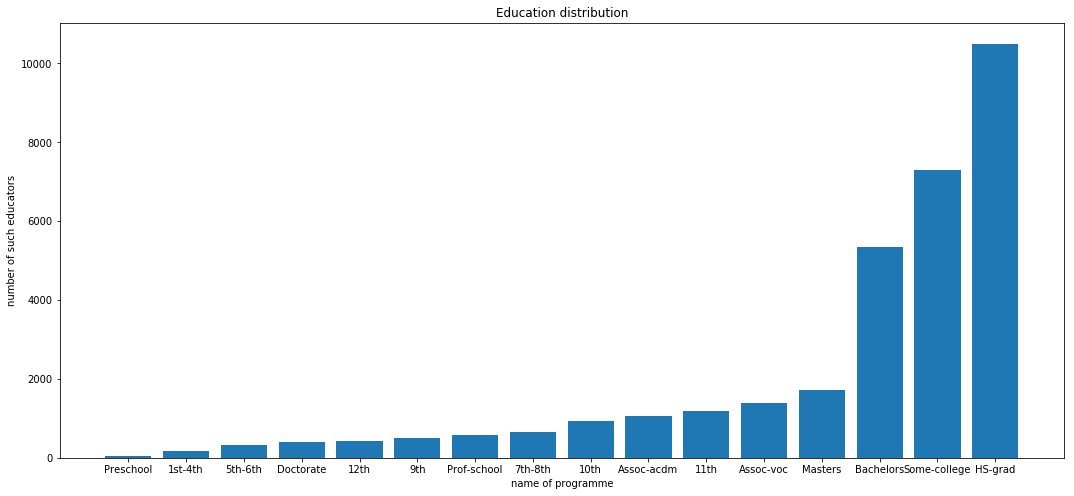

In [158]:
groupped = df.groupby('education').size().sort_values()
plt.figure(figsize=(18, 8))
plt.ylabel('number of such educators')
plt.xlabel('name of programme')
plt.title('Education distribution');
plt.bar(groupped.index, groupped.values)

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [204]:
import scipy.stats as st

In [180]:
df[df['marital-status'] == 'Divorced'].describe()['fnlwgt'].iloc[[1, 2]]

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

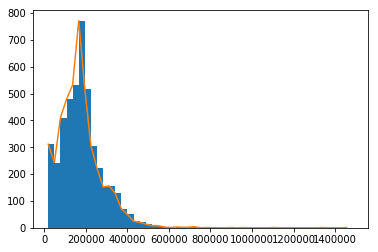

In [226]:
divorced_fnlwgt = df[df['marital-status'] == 'Divorced']['fnlwgt']
info = plt.hist(divorced_fnlwgt, bins = 50)
plt.plot(info[1][:50], info[0])

> Ответ: оно мне напоминает Хи-квадрат распределение

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [267]:
rich_guys = df[df['result'] == '>50K']
rich_guys_w_gd_education = rich_guys['education'].value_counts()

In [272]:
res = 100*(rich_guys_w_gd_edu['Bachelors'] + rich_guys_w_gd_edu['Masters'] + rich_guys_w_gd_edu['Doctorate'])/len(rich_guys)
print('{}% получают зарплату свыше 50к и имеют высшее образование'.format(round(res, 2)))

44.46% получают зарплату свыше 50к и имеют высшее образование


> Ответ: Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [273]:
df.groupby('education')['hours-per-week'].mean().sort_values()

education
11th            33.925957
12th            35.780600
Preschool       36.647059
10th            37.052519
9th             38.044747
1st-4th         38.255952
Some-college    38.852284
5th-6th         38.897898
7th-8th         39.366873
Assoc-acdm      40.504217
HS-grad         40.575374
Assoc-voc       41.610709
Bachelors       42.614006
Masters         43.836332
Doctorate       46.973366
Prof-school     47.425347
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [275]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

Мужчины-трудоголики 

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [279]:
in_rel = round(df[df['relationship'].isin(['Husband', 'Wife'])]['hours-per-week'].mean(),2)
not_in_rel = round(df[df['relationship'].isin(['Not-in-family', 'Unmarried'])]['hours-per-week'].mean(), 2)

print('В отношениях: {} часов, не в отношениях: {} часов'.format(in_rel, not_in_rel))

В отношениях: 43.35 часов, не в отношениях: 40.16 часов


Ответ: те, кто в отношениях

# Из каких стран люди работают farmers/fishers?

In [280]:
df[df['occupation'] == 'Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [282]:
maxh = df['hours-per-week'].max()
print("Максимум в неделю работают по {} часов".format(maxh))

Максимум в неделю работают по 99 часов


In [284]:
npeople = len(df[df['hours-per-week'] == df['hours-per-week'].max()])
print('{} людей работают по {} часов'.format(npeople, maxh))

85 людей работают по 99 часов


In [285]:
df[df['hours-per-week'] == df['hours-per-week'].max()]['result'].value_counts()

<=50K    60
>50K     25
Name: result, dtype: int64